In [ ]:
import pandas as pd
import os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd()

'/content'

In [ ]:
%cd /content/drive/My Drive/IDMChallenge/

/content/drive/My Drive/IDMChallenge


In [ ]:
data = pd.read_csv('Data.csv')

In [ ]:
data.shape

(2783, 133)

In [ ]:
data.info

In [ ]:
data.isnull().sum()

row ID                  0
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
                       ..
small_dents_in_nails    0
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Length: 133, dtype: int64

In [ ]:
# dropping 'row ID' column because (a) its useless (b) its not numerical

data.drop(columns=['row ID'], inplace=True)

In [ ]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

# initialize the data set we'll work with
data, _ = make_classification(
    n_samples= 2783,
    n_features=80,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=0
)

# define the model
gaussian_model = GaussianMixture(n_components=4)

# train the model
gaussian_model.fit(data)

# assign each data point to a cluster
gaussian_result = gaussian_model.predict(data)

# get all of the unique clusters
gaussian_clusters = unique(gaussian_result)



In [ ]:
from sklearn.cluster import Birch

# initialize the data set we'll work with
data_n, _ = make_classification(
    n_samples=2783,
    n_features=4,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# define the model
birch_model = Birch(threshold=0.03, n_clusters=4)

# train the model
birch_model.fit(data_n)

# assign each data point to a cluster
birch_result = birch_model.predict(data_n)

In [ ]:
from sklearn.cluster import AffinityPropagation

# initialize the data set we'll work with
data_n, _ = make_classification(
    n_samples=2783,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=0
)

# define the model
model = AffinityPropagation(damping=0.8)

# train the model
model.fit(data_n)

# assign each data point to a cluster
result = model.predict(data_n)

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(data) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.235511,0.118073
1,-0.210828,0.128600


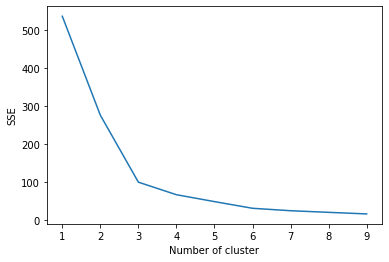

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_principal)

KMeans(n_clusters=3)

In [ ]:
cor_matrix = data.corr().abs()
print(cor_matrix)

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(); print(to_drop)

In [ ]:
from sklearn.cluster import DBSCAN 

data ['cluster'] = DBSCAN(eps=5, min_samples=6).fit_predict(data)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.cluster import AgglomerativeClustering


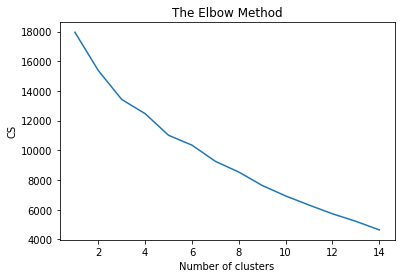

In [ ]:
cs = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 15), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Symptoms')
plt.ylabel('Euclidean distances')
plt.show()

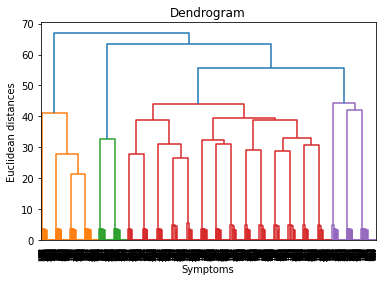

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Symptoms')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
new_labels = pd.DataFrame(hc.labels_)
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(data, new_labels)
print("For n_clusters =", 25, "The average silhouette_score is :", silhouette_avg)

NameError: ignored

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# linear relationships between some of features using correlation heatmap: for example which symptoms occur together?
df_corr = data.iloc[:, 10:40]
plt.figure(figsize = (30, 30))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

In [ ]:
corr = data.corr().abs()
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
print(upper_tri)

In [ ]:
# prepare the highly correlated features in a list so we can drop them :
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
data_n = data.drop(data[to_drop], axis=1)

In [ ]:
data_n.shape

(2783, 106)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=11, affinity='manhattan', linkage='average')
predictions=hc.fit_predict(data_n)

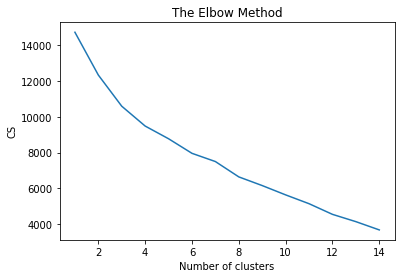

In [ ]:
cs = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_n)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 15), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
data_n.shape

(2783, 107)

In [ ]:
# importing and fitting k means algo
from sklearn.cluster import KMeans
z= list(data)
algorithm = KMeans(n_clusters=7)
for z in range(0,20):
  algorithm.fit(data)

In [ ]:
algorithm.inertia_

9525.367768595097

In [ ]:
kl = KneeLocator(
       range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

In [ ]:
new_labels = pd.DataFrame(algorithm.labels_)
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(data, new_labels)
print("For n_clusters =", 7, "The average silhouette_score is :", silhouette_avg)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For n_clusters = 7 The average silhouette_score is : 0.3095808628558953


In [ ]:
from sklearn.cluster import KMeans

algorithm = KMeans(n_clusters=6, n_init= 20, verbose=0, random_state=0, max_iter= 800)
algorithm.fit(data)

KMeans(max_iter=800, n_clusters=6, n_init=20, random_state=0)

In [ ]:
algorithm.inertia_

10347.727481951626

In [ ]:
print(algorithm.score(data))

-10347.727481951626


In [ ]:
predictions = algorithm.predict(data_n)

In [ ]:
submission = pd.read_csv('sample_submission.csv')

In [ ]:
submission['cluster'] = predictions
submission

,row ID,cluster
0,Row0,5
1,Row1,5
2,Row2,5
3,Row3,5
4,Row4,5
...,...,...
2778,Row2778,10
2779,Row2779,11
2780,Row2780,1
2781,Row2781,1


In [ ]:
submission.to_csv('sample85.csv', index=False)